<a href="https://colab.research.google.com/github/tajuar-akash-hub/Machine-learning-algorithms/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Dataset/Housing.csv')
df.head()

#copy df for future use

copy_df = df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


# To see all unique value from specific feature

In [ ]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc = OrdinalEncoder()

df['mainroad'] = enc.fit_transform(df[['mainroad']])
df['guestroom'] = enc.fit_transform(df[['guestroom']])
df['basement'] = enc.fit_transform(df[['basement']])
df['hotwaterheating'] = enc.fit_transform(df[['hotwaterheating']])
df['airconditioning'] = enc.fit_transform(df[['airconditioning']])
df['prefarea'] = enc.fit_transform(df[['prefarea']])

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,furnished
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,furnished
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,semi-furnished
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,furnished
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,furnished


In [ ]:
#here rank matters

rank= ['unfurnished','semi-furnished','furnished']   #for furnishing status doing the encoding

oe =  OrdinalEncoder(categories=[rank])

df['furnishingstatus'] = enc.fit_transform(df[['furnishingstatus']])

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,0.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,0.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,0.0


In [ ]:
#to see the distribution

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='price', ylabel='Density'>

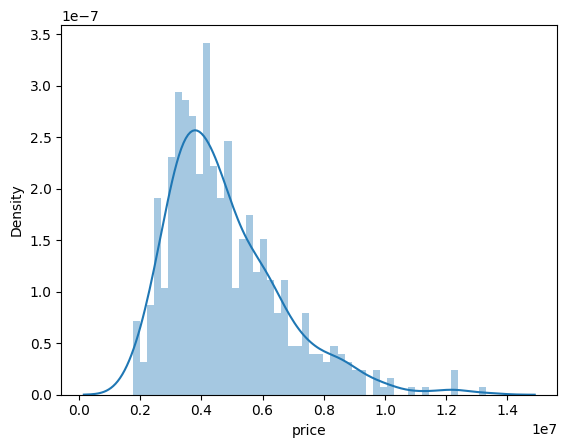

In [ ]:
sns.distplot(df['price'],bins=50)

# **MY version **
# area vs price distribution check
#using different graphs

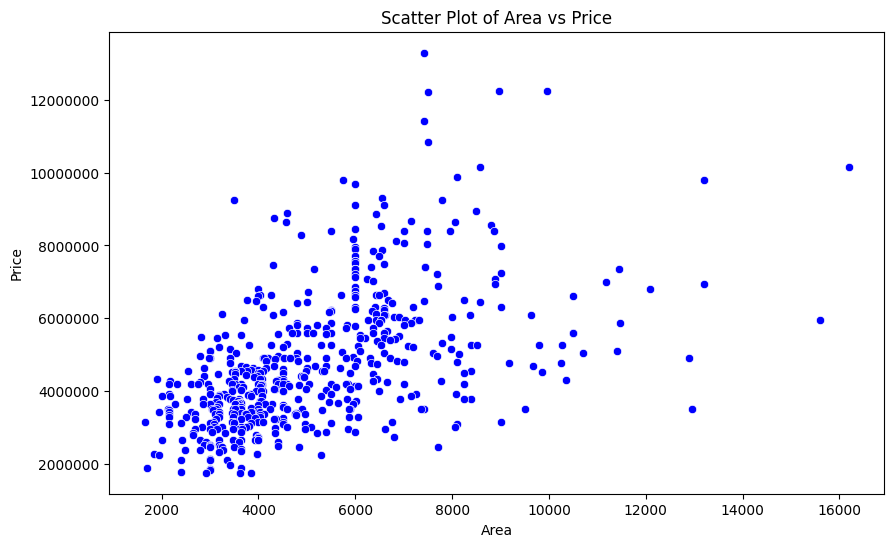

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Scatter plot of area vs price using the original dataframe (df)

plt.figure(figsize=(10,6))

sns.scatterplot(x='area', y='price', data=df, color='blue')

plt.title('Scatter Plot of Area vs Price')

plt.xlabel('Area')
plt.ylabel('Price')

# Ensure y-axis displays the actual price values without scientific notation

ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # Disable scientific notation
ax.ticklabel_format(style='plain', axis='y')  # Set plain formatting for y-axis

plt.show()


# **some usefull codes to check ,  specfic value , max , min ** **

In [ ]:


# Filter the dataset for area = 2000
filtered_df = df[df['area'] == 2000]

# Display the price for area = 2000
print(filtered_df[['area', 'price']])

# Find the maximum and minimum values for 'area' and 'price'
max_area = df['area'].max()
min_area = df['area'].min()

max_price = df['price'].max()
min_price = df['price'].min()

# Display the results
print(f"Maximum Area: {max_area}, Minimum Area: {min_area}")
print(f"Maximum Price: {max_price}, Minimum Price: {min_price}")



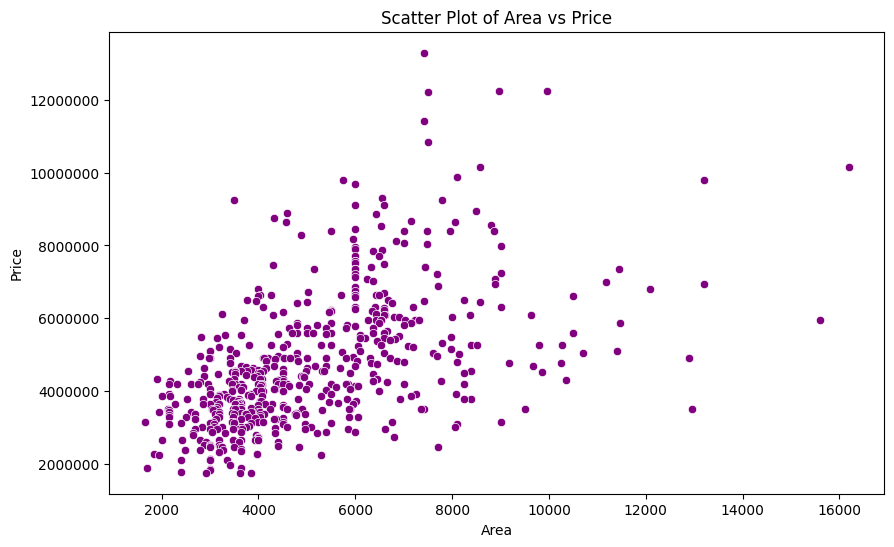

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot using seaborn
plt.figure(figsize=(10,6))
sns.scatterplot(x='area', y='price', data=df, color='purple')
plt.title('Scatter Plot of Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')

# Ensure y-axis displays the actual price values without scientific notation

ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # Disable scientific notation

ax.ticklabel_format(style='plain', axis='y')  # Set plain formatting for y-axis

plt.show()


# ques : what we can see after seeing the distribution ?

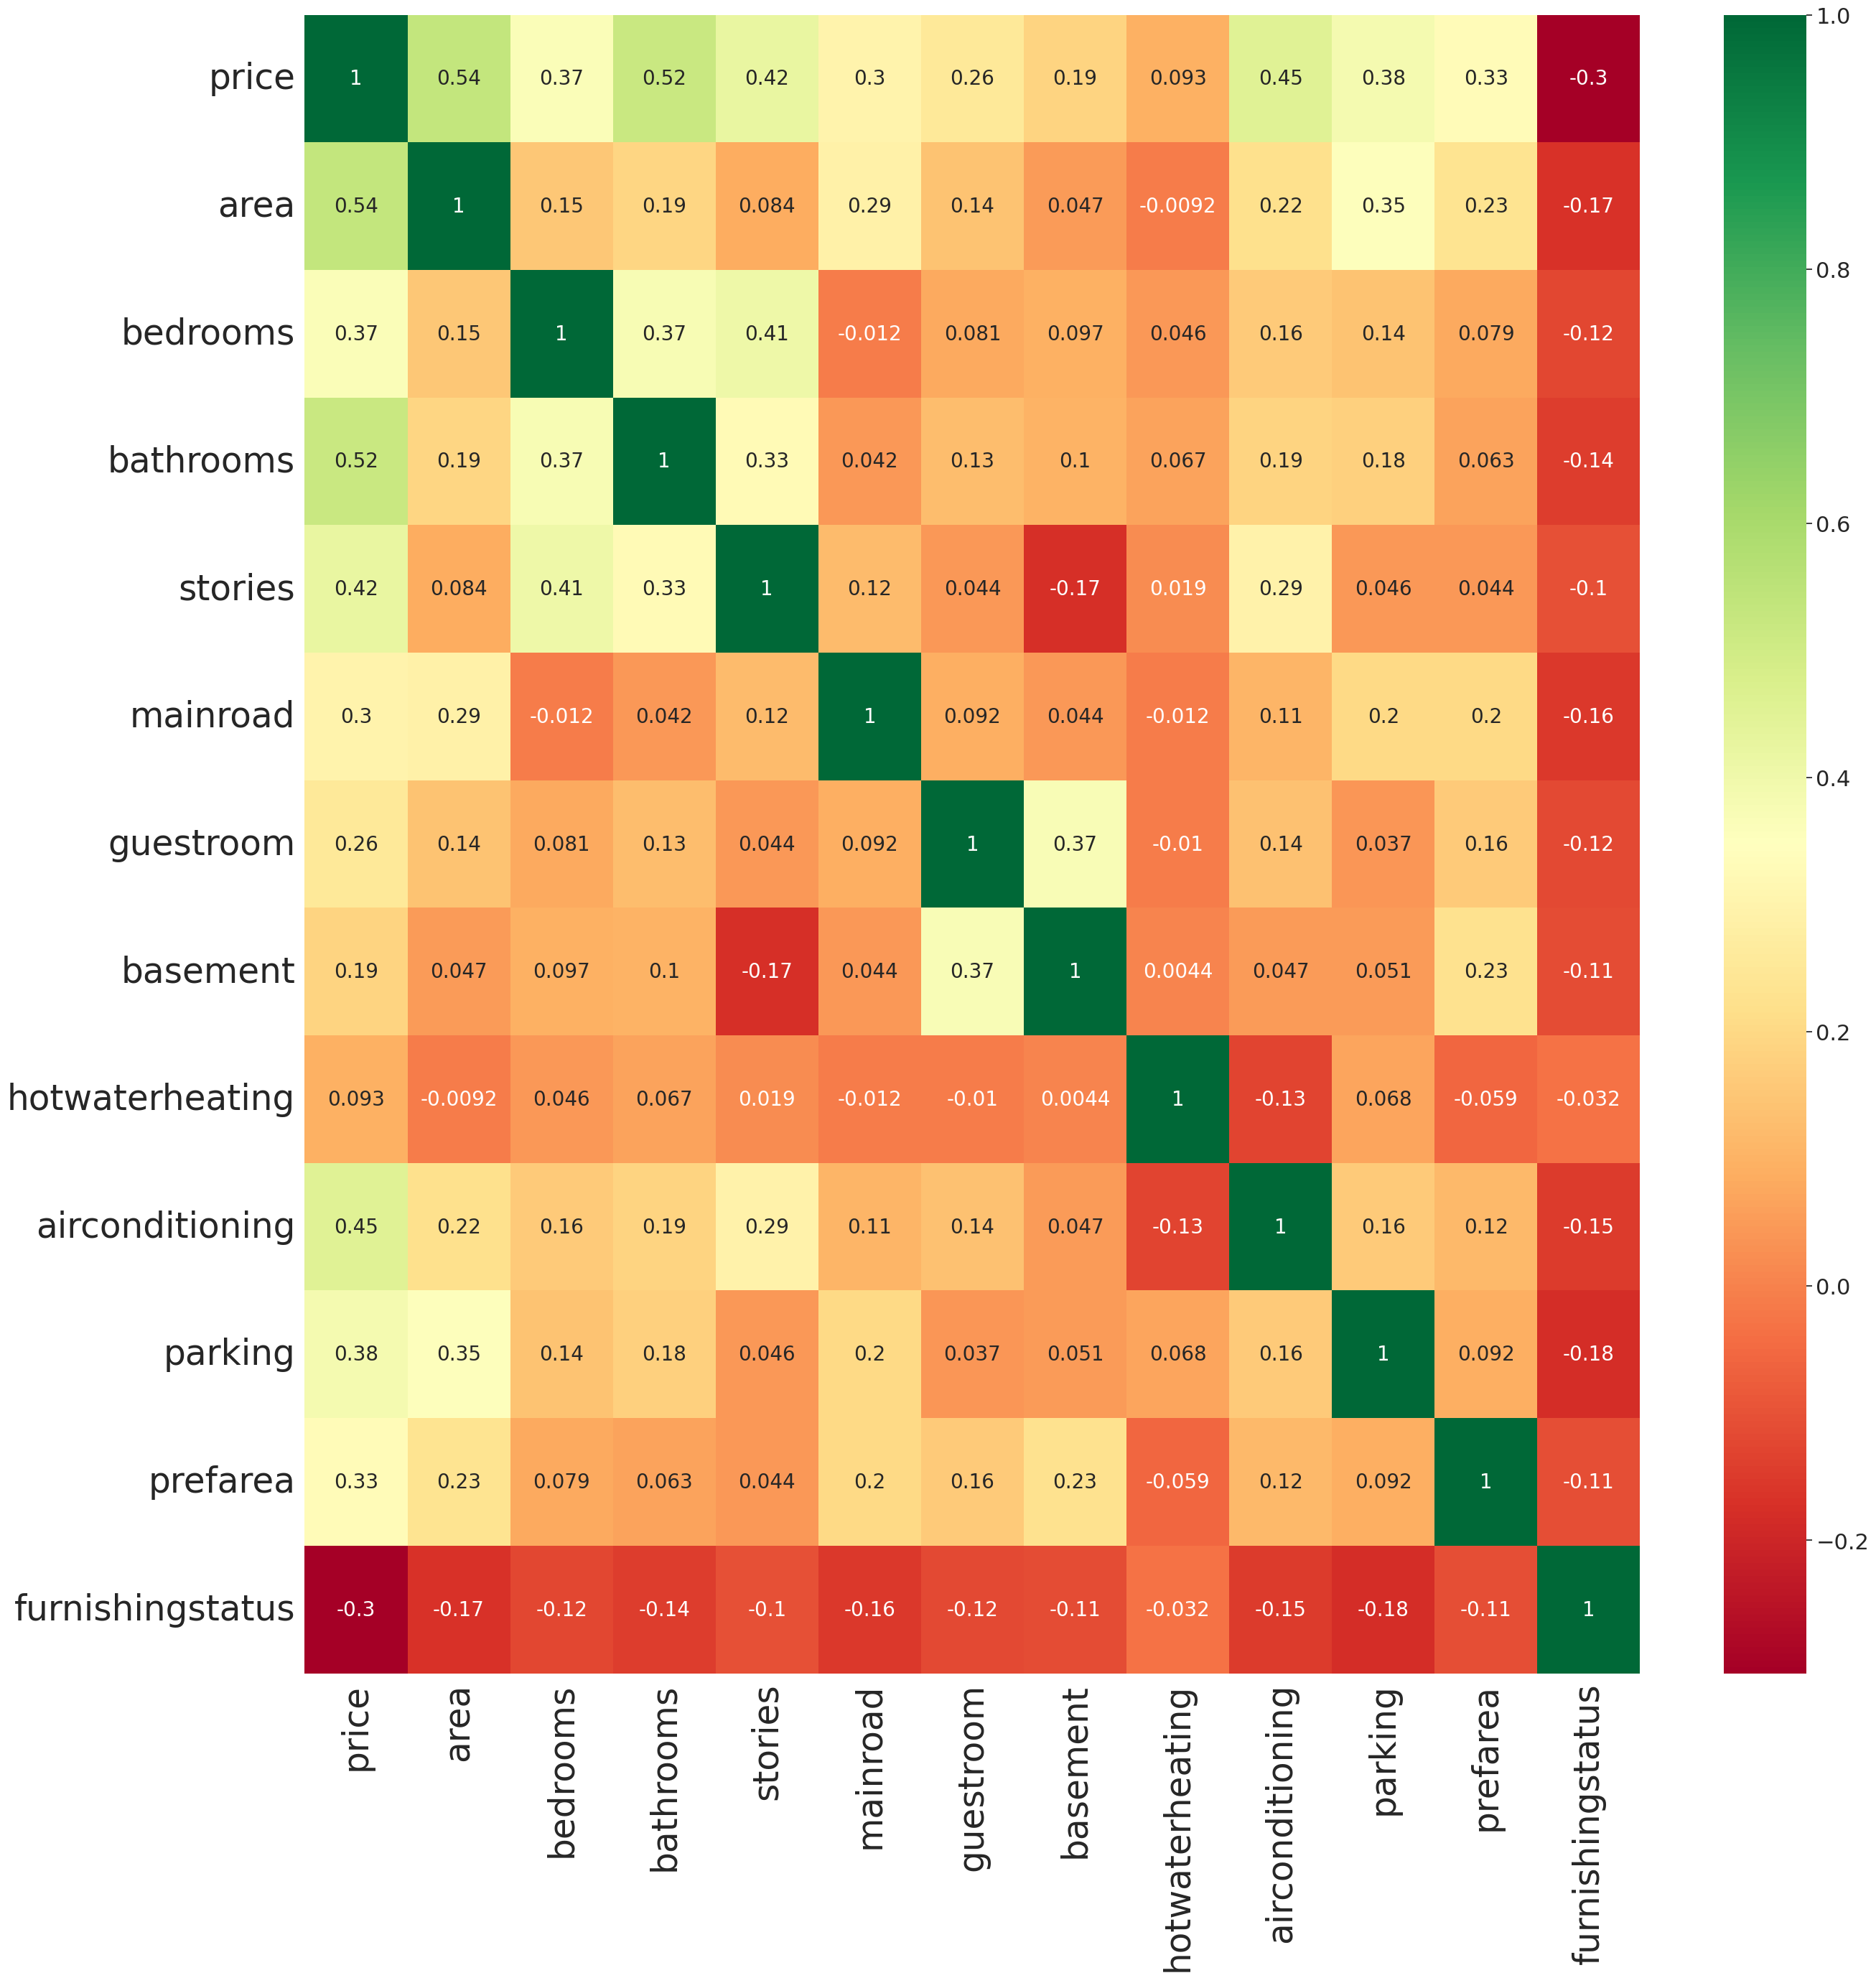

In [ ]:
#now let's go for heatmap

sns.set(font_scale=2)
plt.subplots(figsize=(30,30))
heat_plot=sns.heatmap(df.corr(method='pearson'), annot=True, cmap='RdYlGn',annot_kws={'size':20})
plt.yticks(fontsize=35)
plt.xticks(fontsize=35)

plt.show()

In [ ]:
x =  df.drop(['price'],axis=1)   #here goes our "feautures" because we are droping our price from here

#axis=1 specifies that you are dropping a column (as opposed to a row). If you set axis=0, it would drop rows instead.

y = df['price'] #this is our "target" , we are only taking the price , which we want to predict

#note
#you can remove some feature , which are not co-related


In [ ]:
print(x.shape)

print(y.shape)

(545, 12)
(545,)


In [ ]:
#train , test spllit

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)    #0.2 means 20%

In [ ]:
#size of of x_train and X_test

print("length of x_train ",len(x_train))

print("length of x_test ",len(x_test))

length of x_train  436
length of x_test  109


# Must read the documentation : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# normalization : <br>
# MinMaxScaler : MinMaxScaler scales the data to a fixed range, typically between 0 and 1.

<h1 font color="yellow"> note : never scale target only scale feature , why?
 </h1> <br>

# why we need it ?
ans :


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

#x_trian = subset of features, train the model
#x_test = subset of features , test the model

#y_train = subset of target variable "price"  to train
#y_test = subset of target variable "price" to test


In [ ]:
x_train

array([[0.29896907, 0.4       , 0.33333333, ..., 0.33333333, 0.        ,
        0.        ],
       [0.3814433 , 0.4       , 0.33333333, ..., 1.        , 0.        ,
        0.5       ],
       [0.14886598, 0.2       , 0.        , ..., 0.66666667, 0.        ,
        0.        ],
       ...,
       [0.19587629, 0.4       , 0.33333333, ..., 0.33333333, 0.        ,
        0.        ],
       [0.16426117, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.26460481, 0.4       , 0.33333333, ..., 0.33333333, 0.        ,
        0.5       ]])

In [ ]:
df.head()  #see scaled data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,0.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,0.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,0.0


In [ ]:
print("length of x_train",len(x_train))
print("length of x_test",len(x_test))

print("\n \n ")

print("length of x_train",len(y_train))
print("length of y_test",len(y_test))


length of x_train 436
length of x_test 109

 
 
length of x_train 436
length of y_test 109


# Let's start linear regresion

In [ ]:
from sklearn.linear_model import LinearRegression

reg= LinearRegression()

# y=Wx+b
W is weight(slope) b us bias (intercept term / constant)

In [ ]:
reg.fit(x_train,y_train)

LinearRegression()

*fit_intecept* is used to allow y intercept

copy_x makes a copy of the features

In [ ]:
y_pred= reg.predict(x_test)

In [ ]:
y_pred

array([7593007.09920419, 4339767.85129131, 3924946.09027583,
       4139326.23435871, 5707909.70713008, 6825867.95815289,
       9407135.15665892, 7221302.98708019, 2236234.00579157,
       6501645.06912605, 5016003.41774306, 6859324.00989058,
       7601748.09794136, 3323393.14565093, 2205920.30567697,
       4403076.94556896, 6197812.96306898, 5428643.5101888 ,
       5785373.70610229, 1945737.01142995, 4393333.83501691,
       4802517.1396809 , 7570922.44959406, 8741504.01871459,
       4521948.72589845, 4145833.04021793, 8583005.24365406,
       3715174.72075808, 7389977.49272897, 4142200.12779701,
       8675458.37469162, 2662861.40792587, 5260039.71520512,
       4664156.39658624, 6191239.40276935, 3376655.22300876,
       6169826.62631365, 2636901.05131324, 5993216.27418505,
       6446291.06895713, 3225450.05895562, 4218819.91132785,
       3938526.1834073 , 8449363.84918865, 6414185.2042872 ,
       4502916.29243747, 7483418.59944426, 8995519.90345243,
       4380902.73531181,

In [ ]:
y_test

49     7420000
436    3290000
406    3465000
505    2653000
316    4060000
        ...   
538    1890000
205    4900000
299    4200000
392    3500000
64     7000000
Name: price, Length: 109, dtype: int64

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

In [ ]:
r2= r2_score(y_test,y_pred)
r2

0.6608638129600972

In [ ]:
mse= mean_squared_error(y_pred,y_test)
mse

1373522651776.731

In [ ]:
rmse= math.sqrt(mse)
rmse

1171973.8272575592

In [ ]:
mae= mean_absolute_error(y_pred,y_test)
mae

898601.3214658839